# Classification of Mushrooms

This notebook shows how to classify mushrooms as edible or poisonous by using various Machine Learning Methods. All the code in this notebook is written Python 3.5 . Also library used in this notebook containing Machine Learning methods is sklearn which is an open source library. After classification a small analysis is done on the methods.

In [1]:
#Code is in Python 3.5

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn import preprocessing # Preprocessing
from sklearn import metrics  # For Evaluation
import matplotlib.pyplot as plt #For Plots
%matplotlib inline

This dataset is taken from Kaggle (https://www.kaggle.com )
The link for the dataset is as follows:
https://www.kaggle.com/uciml/mushroom-classification
This dataset includes descriptions of hypothetical samples corresponding to 23 species of
gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon
Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely
edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was
combined with the poisonous one. The dataset has features which are entirely categorical in
nature. The dataset will be used after being transformed by LabelEncoder or OneHotEncoding.
The following describes the columns and its categorical values and what they represent.

**Attribute Information**: (**classes**: edible=e, poisonous=p)
**cap-shape**: bell=b, conical=c, convex=x ,flat=f, knobbed=k, sunken=s
**cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
**cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w,
yellow=y
**bruises**: bruises=t, no=f
**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
**gill-attachment**: attached=a, descending=d, free=f, notched=n
**gill-spacing**: close=c, crowded=w, distant=d
**gill-size**: broad=b, narrow=n
**gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o ,pink=p,
purple=u, red=e, white=w, yellow=y
**stalk-shape**: enlarging=e, tapering=t
**stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
**stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s 
**stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
**stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e,
white=w, yellow=y
**stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e,
white=w, yellow=y
**veil-type**: partial=p, universal=u
**veil-color**: brown=n, orange=o, white=w, yellow=y
**ring-number**: none=n ,one=o, two=t
**ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s,
zone=z
**spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u,
white=w, yellow=y
**population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
**habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [2]:
#Importing the dataset 
raw_data=pd.read_csv('mushrooms.csv')

#Display top few rows in the dataset
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
#See the description of different columns
for col in raw_data :
    print()
    print ('Column Name: ',col)
    print(raw_data[col].describe())
 


Column Name:  class
count     8124
unique       2
top          e
freq      4208
Name: class, dtype: object

Column Name:  cap-shape
count     8124
unique       6
top          x
freq      3656
Name: cap-shape, dtype: object

Column Name:  cap-surface
count     8124
unique       4
top          y
freq      3244
Name: cap-surface, dtype: object

Column Name:  cap-color
count     8124
unique      10
top          n
freq      2284
Name: cap-color, dtype: object

Column Name:  bruises
count     8124
unique       2
top          f
freq      4748
Name: bruises, dtype: object

Column Name:  odor
count     8124
unique       9
top          n
freq      3528
Name: odor, dtype: object

Column Name:  gill-attachment
count     8124
unique       2
top          f
freq      7914
Name: gill-attachment, dtype: object

Column Name:  gill-spacing
count     8124
unique       2
top          c
freq      6812
Name: gill-spacing, dtype: object

Column Name:  gill-size
count     8124
unique       2
top          b
fr

In [4]:
# Different values in the columns and its count
for col in raw_data :
    print()
    print ('Column Name: ',col)
    print(raw_data[col].value_counts())


Column Name:  class
e    4208
p    3916
Name: class, dtype: int64

Column Name:  cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

Column Name:  cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

Column Name:  cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Column Name:  bruises
f    4748
t    3376
Name: bruises, dtype: int64

Column Name:  odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

Column Name:  gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

Column Name:  gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

Column Name:  gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

Column Name:  gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96

In [5]:
#Split the file into samples and labels
samples = raw_data.drop('class',1)
labels = raw_data['class']
print('Samples')
print(samples[:5])
print()
print('Labels')
print(labels[:5])



Samples
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape   ...   stalk-surface-below-ring  \
0         n          k           e   ...                          s   
1         b          k           e   ...                          s   
2         b          n           e   ...                          s   
3         n          n           e   ...                          s   
4         b          k           t   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                 

From the description of data it can be seen that all of the values are categorical values. Thus before initiating training we have to convert them into numerical values. This is done using Label Encoder as shown below

In [6]:

lb=preprocessing.LabelEncoder() #Initating the encoder

#Encoding the features(columns of samples)
for cols in samples.columns:
    samples[cols] = lb.fit_transform(samples[cols])

print('Samples')
print(samples[:5])
print()

#Encoding the labels
labels=lb.fit_transform(labels)
print('Labels')
print(labels[:5])

Samples
   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape   ...     \
0             0          1           4            0   ...      
1             0          0           4            0   ...      
2             0          0           5            0   ...      
3             0          1           5            0   ...      
4             1          0           4            1   ...      

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1               

Now that ecoding is done it is time to split the data for training , validation and testing purposes. This is done so that a model does not overfit to the training data. Validation data is done so as to select the type of models which perform good in validation set after having trained in training set. But still there is one more problem which arises that is bleeding of the validation data into the training data. This happens when one tries to maximize the performance in validation set by tweaking the parameters in training set. Thus the model tries to indirectly fit the validation set.

Thus the need for a set which can be used for testing and which is isolated from training is required. Performance on this set will be the final deciding factor for selection of the best model. 

In [7]:
from sklearn.model_selection import train_test_split # for splitting the data

# Normally data is split into 70,15,15 % for training , validation and testing respectivlely

X_train, X_valid, Y_train, Y_valid = train_test_split(samples, labels, test_size=0.30, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.50, random_state=42)
print('Training data count : {}'.format(X_train.count()[0]))
print('Validation data count : {}'.format(X_valid.count()[0]))
print('Testing data count : {}'.format(X_test.count()[0]))

Training data count : 5686
Validation data count : 1219
Testing data count : 1219





Now lets set a benchmark model which we can compare with other models. Since this is a binary classification problem the simplest model would be when the model classifies each sample as poisonous i.e. 1. This will cause roughly half of the samples to be classified correclty.

In [8]:
#Benchmark model
#Making predictions as 1(poisonous)
Y_pred =np.ones_like(Y_test)

In [9]:
print('Precision: {0:2f}'.format(metrics.precision_score(Y_test,Y_pred)))
print('Accuracy: {0:2f}'.format(metrics.accuracy_score(Y_test,Y_pred)))
print('Recall: {0:2f}'.format(metrics.recall_score(Y_test,Y_pred)))
print('F1 score: {0:2f}'.format(metrics.f1_score(Y_test,Y_pred)))

Precision: 0.490566
Accuracy: 0.490566
Recall: 1.000000
F1 score: 0.658228


Thus from above it is certain that the worst a model can perform would have these values. For our model it is important to absolutely classify poisonous correctly. Thus importance will be given to precision and F1 score rather then accuracy.

For training following models are considered :
1) Logistic Regression
2) Decision Tree Classifier
3) Random Forest
4) Support Vector Machines
5) AdaBoost Classifier
6) xgBoost Classifier
7) Stochastic Gradient Descent

In [10]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier



models ={'Logistic Regression':LogisticRegression(),'Decision Tree Classifier':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),'Support Vector Machines':SVC(),'AdaBoost Classifier':AdaBoostClassifier(),
         'Stochastic Gradient Descent':SGDClassifier(),'XGBoost Classifiier':XGBClassifier()}

In [11]:
#Training models on training set and performance evluation on validation set
scores_precision=[]
scores_acc=[]
scores_recall=[]
scores_f1score=[]
names=[]
for name,model in models.items():
    model.fit(X_train,Y_train)
    names.append(name)
    precision=metrics.precision_score(Y_valid,model.predict(X_valid))
    scores_precision.append(precision)
    acc=metrics.accuracy_score(Y_valid,model.predict(X_valid))
    scores_acc.append(acc)
    recall=metrics.recall_score(Y_valid,model.predict(X_valid))
    scores_recall.append(recall)
    f1score=metrics.f1_score(Y_valid,model.predict(X_valid))
    scores_f1score.append(f1score)
   
    dataframe = pd.DataFrame({'Models':names,'Precision':scores_precision,'F1-score':scores_f1score,
                              'Accuracy':scores_acc,'Recall':scores_recall})
    
cols = list(dataframe)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Models')))
dataframe = dataframe.ix[:, cols]
dataframe

,Models,Accuracy,F1-score,Precision,Recall
0,Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Support Vector Machines,1.000000,1.000000,1.000000,1.000000
3,Stochastic Gradient Descent,0.919606,0.914035,0.935368,0.893654
4,Logistic Regression,0.938474,0.935843,0.933447,0.938250
5,XGBoost Classifiier,1.000000,1.000000,1.000000,1.000000
6,AdaBoost Classifier,1.000000,1.000000,1.000000,1.000000


From the result above it can be concluded that Stochastic Gradient Descent and Logistic regression performs worst in this dataset classification. And rest of the classifiers perform exceptionally well in classification. As previously specified the model will be chosen based on the Precision score and F1 score. Thus any of the following models could be used : Decision Tree Classifier, AdaBoost Classifier, Support Vector Machines, Random Forest.

The models train on a large number of features. And may be not all features contribute to the classification. In this dataset and classification the number of features used are 22. Thus to check weather these features actually conrtibute to the classification we will use PCA(Principle Component Analysis) available from sklearn.decomposition . We shall first import the PCA.Then run it with all the components, plot a bar graph. Calculate how many features are required to maintain 99.5% of data variance.

In [12]:
from sklearn.decomposition import PCA #Importing PCA
pca=PCA(n_components=22) # Initializing PCA
pca.fit(X_train) 
var_ratio=pca.explained_variance_ratio_
print('First 5 features variance ratio is :',var_ratio[:5])

First 5 features variance ratio is : [ 0.33878807  0.16511952  0.12277489  0.06928601  0.05836053]


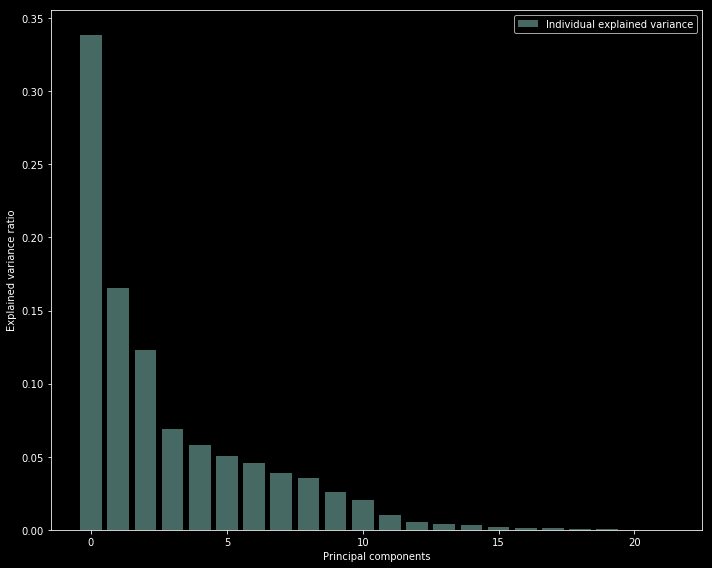

In [13]:
#Plot to show fetures contribution to variance
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 8))
    
    plt.bar(range(22), var_ratio, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


In [14]:
#Now calculating the number of features required to contain 99.5% of the data's variance
add =0.0
count =0
for i in range(22):
    count+= 1
    add+= var_ratio[i]
    if ((add/1.0)*100 >99.5) :
        break
        
print('{} features are required to contain {} % of variance in data'.format(count,add*100))       

16 features are required to contain 99.64669109357057 % of variance in data


Now that we have determined that 16 features are enough to contain 99.5% of variance, we will transform the data into its 16 principle components and retrain the models on these features.

In [15]:
#Transforming into 16 principle components
pca=PCA(n_components=16) # Initializing PCA
pca.fit(X_train)
X_train_pca= pca.transform(X_train)
X_valid_pca= pca.transform(X_valid)# for validation purposes
X_test_pca=pca.transform(X_test)
print(X_train_pca[:5])

[[  7.87159390e-01  -3.05939069e-01   1.67521591e+00  -3.84647670e+00
    5.58736483e+00   1.09488269e+00  -3.76881442e-01   2.00618095e+00
   -5.79328810e-01   4.64266301e-01   3.62531621e-02  -1.41577899e+00
    1.84036546e-01   1.16927089e+00  -6.10717069e-01   1.59486394e-01]
 [ -2.69236937e+00  -2.28748744e+00   5.70686038e-01  -2.77025414e+00
   -9.50369499e-01   4.37899764e-01   6.64031960e-01   1.09576837e+00
    2.32572869e-01   1.43347650e+00  -5.63360319e-01   4.61922163e-02
   -3.82590611e-01  -1.47726217e-01  -2.21734284e-01  -1.77441561e-01]
 [ -3.76567093e+00   1.09484606e+00   5.82870184e+00   7.65118748e-02
   -2.21640613e-01   1.49663300e+00   6.54384282e-01  -2.76716579e+00
   -2.07732923e+00   7.64224585e-01   1.50949733e-01  -2.03761633e-02
    8.80422377e-02   5.62436832e-02   3.46198297e-01  -1.49182664e-02]
 [ -2.20470771e+00   5.17564318e+00  -3.34954134e+00  -1.52603668e+00
    8.79615852e-01  -1.70609058e-01   2.21010198e+00  -1.39662335e-01
    4.79019111e-0

Now let us re-train all the models with the transformed features and compare them.

In [16]:
#Retraining the models on X_train_pca features and validating on X_valid_pca
scores_precision=[]
scores_acc=[]
scores_recall=[]
scores_f1score=[]
names=[]
for name,model in models.items():
    model.fit(X_train_pca,Y_train)
    names.append(name)
    precision=metrics.precision_score(Y_valid,model.predict(X_valid_pca))
    scores_precision.append(precision)
    acc=metrics.accuracy_score(Y_valid,model.predict(X_valid_pca))
    scores_acc.append(acc)
    recall=metrics.recall_score(Y_valid,model.predict(X_valid_pca))
    scores_recall.append(recall)
    f1score=metrics.f1_score(Y_valid,model.predict(X_valid_pca))
    scores_f1score.append(f1score)
    dataframe = pd.DataFrame({'Models':names,'Precision':scores_precision,'F1-score':scores_f1score,
                              'Accuracy':scores_acc,'Recall':scores_recall})
    
cols = list(dataframe)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Models')))
dataframe = dataframe.ix[:, cols]
dataframe

,Models,Accuracy,F1-score,Precision,Recall
0,Decision Tree Classifier,0.990156,0.989708,0.989708,0.989708
1,Random Forest,0.998359,0.998282,1.000000,0.996569
2,Support Vector Machines,1.000000,1.000000,1.000000,1.000000
3,Stochastic Gradient Descent,0.864643,0.862843,0.837097,0.890223
4,Logistic Regression,0.880230,0.873264,0.884007,0.862779
5,XGBoost Classifiier,0.991797,0.991364,0.998261,0.984563
6,AdaBoost Classifier,0.966366,0.964927,0.962457,0.967410


From the results above it clearly shows that without any optimization the best models for this scenario are SVM and random forest followed by XGBoost, Decision Tree Classifier and AdaBoost Classifier.Logistic Classifier and Stochastic Gradient Descent perform the worst. Thus we will select SVM, Random Forest, XGBoost, Decision Tree Classifier and AdaBoost Classifier for final testing in the test data set. ALso we will try to optimize them with the help of Grid Search CV.

In [17]:
#Importing Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,precision_score

#Initializing few models for Grid Search CV
svr =SVC()
ran=RandomForestClassifier()
xgb=XGBClassifier()
ada=AdaBoostClassifier()
dt=DecisionTreeClassifier()

#parameters for Support Vector Machine
parameters_svr = {'C':[0.1,0.3,0.9,1.0,3.0,9.0,10.0],
                  'kernel':('linear','rbf'),
                  'random_state':[1,42,56,32,15]}
#parameters for Random_forest
parameters_ran = {'n_estimators':[2,5,7,10,12,15,18,20],'random_state':[1,42,56,32,15]}

#parameters for XG Boost Classifier
parameters_xgb = {'learning_rate':[0.01,0.03,0.09,0.1,0.3,0.9,1],'booster':('gbtree','gblinear','dart'),
                  'random_state':[1,15,2,3,48,42]}

#parameters for Decision Tree Classifier
parameters_dt = {'min_samples_split':[2,7,10], 'random_state':[1,42,56,32,15]}

#parameters for AdaBoost Classifier
parameters_ada= {'learning_rate':[0.01,0.03,0.09,0.1,0.3,0.9,1],'n_estimators':[10,30,50,70],
                'random_state':[1,42,56,32,15]}

#Defining precision as the factor for comparision
scorer = make_scorer(precision_score)


In [18]:
#Calculating best parameters for SVM
clf = GridSearchCV(svr,parameters_svr,scoring=scorer)
clf.fit(X_train_pca,Y_train)
print('SVM best Parameters: ')
print(clf.best_params_)
print('')

SVM best Parameters: 
{'random_state': 1, 'C': 3.0, 'kernel': 'rbf'}



In [19]:
#Calculating best parameters for Random Forest
clf = GridSearchCV(ran,parameters_ran,scoring=scorer)
clf.fit(X_train_pca,Y_train)
print('Random Forest best Parameters: ')
print(clf.best_params_)
print('')


Random Forest best Parameters: 
{'random_state': 1, 'n_estimators': 7}



In [20]:
#Calculating best parameters for xgBoost Classifier
clf = GridSearchCV(xgb,parameters_xgb,scoring=scorer)
clf.fit(X_train_pca,Y_train)
print('XG Boost best Parameters: ')
print(clf.best_params_)
print('')


XG Boost best Parameters: 
{'learning_rate': 0.9, 'random_state': 1, 'booster': 'gbtree'}



In [21]:
#Calculating best parameters for DecisionTree Classifier
clf = GridSearchCV(dt,parameters_dt,scoring=scorer)
clf.fit(X_train_pca,Y_train)
print('DecisionTree best Parameters: ')
print(clf.best_params_)
print('')


DecisionTree best Parameters: 
{'random_state': 42, 'min_samples_split': 2}



In [22]:
#Calculating best parameters for AdaBoost Classifier
clf = GridSearchCV(ada,parameters_ada,scoring=scorer)
clf.fit(X_train_pca,Y_train)
print('AdaBoost best Parameters: ')
print(clf.best_params_)
print('')


AdaBoost best Parameters: 
{'learning_rate': 1, 'random_state': 1, 'n_estimators': 70}



**Note** : Parameter optimization takes very long time (about 15 min for SVM, Adaboost, xgboost) depending on the processing power. Models like Decision Trees and Random Forest take minimal time.

Now that we have optimal parameters  from the set of parameters that we defined, let us re-train these models on the opitmal parameters and then test them with test set which we have previously kept aside.

In [23]:
model_optimal={'Random Forest':RandomForestClassifier(n_estimators=7,random_state=1),
               'Support Vector Machines':SVC(kernel='rbf',random_state=1,C=3),
               'XG Boost Classifier':XGBClassifier(random_state=1, booster='gbtree', learning_rate= 0.9),
               'Decision Tree Classifier': DecisionTreeClassifier(min_samples_split= 2, random_state= 42),
               'AdaBoost Classifier': AdaBoostClassifier(random_state= 1, n_estimators= 70, learning_rate= 1)}
scores_precision=[]
scores_acc=[]
scores_recall=[]
scores_f1score=[]
names=[]
for name,model in model_optimal.items():
    model.fit(X_train_pca,Y_train)
    names.append(name)
    precision=metrics.precision_score(Y_valid,model.predict(X_valid_pca))
    scores_precision.append(precision)
    acc=metrics.accuracy_score(Y_valid,model.predict(X_valid_pca))
    scores_acc.append(acc)
    recall=metrics.recall_score(Y_valid,model.predict(X_valid_pca))
    scores_recall.append(recall)
    f1score=metrics.f1_score(Y_valid,model.predict(X_valid_pca))
    scores_f1score.append(f1score)
    dataframe = pd.DataFrame({'Models':names,'Precision':scores_precision,'F1-score':scores_f1score,
                              'Accuracy':scores_acc,'Recall':scores_recall})
    
cols = list(dataframe)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Models')))
dataframe = dataframe.ix[:, cols]
dataframe

,Models,Accuracy,F1-score,Precision,Recall
0,Decision Tree Classifier,0.989336,0.988860,0.988014,0.989708
1,Random Forest,1.000000,1.000000,1.000000,1.000000
2,Support Vector Machines,1.000000,1.000000,1.000000,1.000000
3,XG Boost Classifier,1.000000,1.000000,1.000000,1.000000
4,AdaBoost Classifier,0.977851,0.976744,0.980969,0.972556


It can be observed that by optimizing there is mariginal increase in the performance of the models as previously models were already giving very high performance.

**Now lets test the models on test data**

In [24]:
#Transforming X_test to PCA components
X_test_pca = pca.transform(X_test)


scores_precision=[]
scores_acc=[]
scores_recall=[]
scores_f1score=[]
names=[]
for name,model in model_optimal.items():
    model.fit(X_train_pca,Y_train)
    names.append(name)
    precision=metrics.precision_score(Y_test,model.predict(X_test_pca))
    scores_precision.append(precision)
    acc=metrics.accuracy_score(Y_test,model.predict(X_test_pca))
    scores_acc.append(acc)
    recall=metrics.recall_score(Y_test,model.predict(X_test_pca))
    scores_recall.append(recall)
    f1score=metrics.f1_score(Y_test,model.predict(X_test_pca))
    scores_f1score.append(f1score)
    dataframe = pd.DataFrame({'Models':names,'Precision':scores_precision,'F1-score':scores_f1score,
                              'Accuracy':scores_acc,'Recall':scores_recall})
    
cols = list(dataframe)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Models')))
dataframe = dataframe.ix[:, cols]
dataframe


,Models,Accuracy,F1-score,Precision,Recall
0,Decision Tree Classifier,0.997539,0.997498,0.995008,1.000000
1,Random Forest,0.998359,0.998325,1.000000,0.996656
2,Support Vector Machines,1.000000,1.000000,1.000000,1.000000
3,XG Boost Classifier,0.999180,0.999163,1.000000,0.998328
4,AdaBoost Classifier,0.983593,0.983221,0.986532,0.979933


**Thus it can be concluded that best models for classification are : Support Vector Machines, Random Forest and xgBoost for when we have applied PCA. But training time wise , it can be said that Decision tree is the fastest and SVM takes the most time for training. But overall if training time is not a constraint then SVM  could be said to be the best model for classification for this type of problem. SVM has been consistently giving outstanding performance in this problem. It has perfect results in all areas in all types of tesing (validation , testing). Thus it could be said to be the best model If training time is a constraint then Random Forest should be the next best classifier.**

Code Reference :

https://www.kaggle.com/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison


https://www.kaggle.com/monkeydunkey/a-comparison-of-few-ml-models
